# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [2]:
# load in the data
azdias = pd.read_csv('Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('Udacity_CUSTOMERS_052018.csv', sep=';')

/Users/nareshsharma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

The following meanings are equivalent of NaN (by looking at DIAS Attributes - Values 2017.xlsx)- 
1. The value of -1, represents an unknown value
2. For a few other attrbutes a value of 0 or 9 or 10 is used to represent an unknow value... we'll takle this later


In [4]:
print(azdias.shape)
azdias.info(verbose=True)

(891221, 366)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 366 columns):
LNR                            int64
AGER_TYP                       int64
AKT_DAT_KL                     float64
ALTER_HH                       float64
ALTER_KIND1                    float64
ALTER_KIND2                    float64
ALTER_KIND3                    float64
ALTER_KIND4                    float64
ALTERSKATEGORIE_FEIN           float64
ANZ_HAUSHALTE_AKTIV            float64
ANZ_HH_TITEL                   float64
ANZ_KINDER                     float64
ANZ_PERSONEN                   float64
ANZ_STATISTISCHE_HAUSHALTE     float64
ANZ_TITEL                      float64
ARBEIT                         float64
BALLRAUM                       float64
CAMEO_DEU_2015                 object
CAMEO_DEUG_2015                object
CAMEO_INTL_2015                object
CJT_GESAMTTYP                  float64
CJT_KATALOGNUTZER              float64
CJT_TYP_1              

In [5]:

# clean up
# Step 1 
#   Select only the colums that are part of the attribute list
#   Replace all unknown values with a NaN
# Step 2... 
#   identify attributes which have a significant percent of their values as NaN...
#   drop columns which has more than 50% of their values as NA/NULL
#   Replace the rest of the NaN values appropriate... look at the data distribution to take a call
# Step 3...
#   use hotfixing to convert categories into features

In [6]:
azdias.head()

LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0  910215        -1         NaN       NaN          NaN          NaN   
1  910220        -1         9.0       0.0          NaN          NaN   
2  910225        -1         9.0      17.0          NaN          NaN   
3  910226         2         1.0      13.0          NaN          NaN   
4  910241        -1         1.0      20.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  \
0          NaN          NaN                   NaN                  NaN   
1          NaN          NaN                  21.0                 11.0   
2          NaN          NaN                  17.0                 10.0   
3          NaN          NaN                  13.0                  1.0   
4          NaN          NaN                  14.0                  3.0   

   ANZ_HH_TITEL  ANZ_KINDER  ANZ_PERSONEN  ANZ_STATISTISCHE_HAUSHALTE  \
0           NaN         NaN           NaN                         NaN   
1           0.0         0.0           2.0                        12.0   
2           0.0         0.0           1.0                         7.0   
3           0.0         0.0           0.0                         2.0   
4           0.0         0.0           4.0                         3.0   

   ANZ_TITEL  ARBEIT  BALLRAUM CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015  \
0        NaN     NaN       NaN            NaN             NaN             NaN   
1        0.0     3.0       6.0             8A               8              51   
2        0.0     3.0       2.0             4C               4              24   
3        0.0     2.0       4.0             2A               2              12   
4        0.0     4.0       2.0             6B               6              43   

   CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  CJT_TYP_2  CJT_TYP_3  \
0            2.0                5.0        1.0        1.0        5.0   
1            5.0                1.0        5.0        5.0        2.0   
2            3.0                2.0        4.0        4.0        1.0   
3            2.0                3.0        2.0        2.0        4.0   
4            5.0                3.0        3.0        3.0        3.0   

   CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  \
0        5.0        5.0        5.0                  0                  0   
1        3.0        1.0        1.0                  0                  0   
2        3.0        2.0        2.0                  0                  0   
3        4.0        5.0        3.0                  0                  0   
4        4.0        3.0        3.0                  3                  5   

   D19_BANKEN_DATUM  D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
0                10                  0                 0                 0   
1                10                  0                 0                 0   
2                10                  0                 0                 0   
3                10                  0                 0                 0   
4                 5                  1                 2                 0   

   D19_BANKEN_OFFLINE_DATUM  D19_BANKEN_ONLINE_DATUM  \
0                        10                       10   
1                        10                       10   
2                        10                       10   
3                        10                       10   
4                        10                        5   

   D19_BANKEN_ONLINE_QUOTE_12  D19_BANKEN_REST  D19_BEKLEIDUNG_GEH  \
0                         NaN                0                   0   
1                         NaN                0                   0   
2                         0.0                0                   0   
3                         0.0                0                   0   
4                        10.0                6                   6   

   D19_BEKLEIDUNG_REST  D19_BILDUNG  D19_BIO_OEKO  D19_BUCH_CD  \
0                    0   

In [7]:
# Read in only the rows with the attribute names
# This serves 2 purposes.. first we get the attribut names... 
# Also, if one of the values is unknown... then, it is present as part of the first row 
# and hence we get that info as well
df_attrs = pd.read_excel('DIAS Attributes - Values 2017.xlsx', skiprows=1)
df_attrs.drop(columns=df_attrs.columns[0], inplace=True)
df_attrs.dropna(inplace=True)
df_attrs = df_attrs.reset_index()
print(df_attrs.shape)
df_attrs.head()

(314, 6)


index             Attribute                                   Description  \
0      0              AGER_TYP                            best-ager typology   
1      5  ALTERSKATEGORIE_GROB  age classification through prename analysis    
2     11              ALTER_HH                 main age within the household   
3     33             ANREDE_KZ                                        gender   
4     36   ANZ_HAUSHALTE_AKTIV          number of households in the building   

   Value                                    Meaning       Type  
0     -1                                    unknown   Category  
1  -1, 0                                    unknown  Numerical  
2      0           unknown / no main age detectable  Numerical  
3  -1, 0                                    unknown   Category  
4      …  numeric value (typically coded from 1-10)  Numerical

In [8]:
df_values = pd.read_excel('DIAS Attributes - Values 2017.xlsx', skiprows=1)
df_values.drop(columns=df_values.columns[0], inplace=True)
# df_values.dropna(inplace=True)
df_values.Attribute = df_values.Attribute.fillna(method='ffill')
# df_values = df_values.reset_index()
print(df_values.shape)
df_values.head()

(2258, 5)


Attribute         Description Value                     Meaning      Type
0  AGER_TYP  best-ager typology    -1                     unknown  Category
1  AGER_TYP                 NaN     0  no classification possible       NaN
2  AGER_TYP                 NaN     1             passive elderly       NaN
3  AGER_TYP                 NaN     2            cultural elderly       NaN
4  AGER_TYP                 NaN     3   experience-driven elderly       NaN

* Note that above, we have introduced a new column called Type. We have marked all Attributes that ***doesn't*** seem like something that could be measured as a number, as a category.

In [9]:
common_columns = (set(list(df_attrs.Attribute)) & set(list(azdias.columns)))
common_columns

{'AGER_TYP',
 'ALTERSKATEGORIE_GROB',
 'ALTER_HH',
 'ANREDE_KZ',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'BALLRAUM',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CJT_GESAMTTYP',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_KONSUMTYP',
 'D19_TELKO_ANZ_12',
 'D19_TELKO_ANZ_24',
 'D19_TELKO_DATUM',
 'D19_TELKO_OFFLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'D19_VERSAND_ANZ_12',
 'D19_VERSAND_ANZ_24',
 'D19_VERSAND_DATUM',
 'D19_VERSAND_OFFLINE_DATUM',
 'D19_VERSAND_ONLINE_DATUM',
 'D19_VERSAND_ONLINE_QUOTE_12',
 'D19_VERSI_ANZ_12',
 'D19_VERSI_ANZ_24',
 'EWDICHTE',
 'FINANZTYP',
 'FINANZ_ANLEGER',
 'FINANZ_HAUSBAUER',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_VORSORGER

In [10]:
list(azdias.columns)
azdias_sel_cols = azdias[common_columns]
print(azdias_sel_cols.shape)
list(azdias_sel_cols.columns.sort_values())

(891221, 272)


['AGER_TYP',
 'ALTERSKATEGORIE_GROB',
 'ALTER_HH',
 'ANREDE_KZ',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'BALLRAUM',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CJT_GESAMTTYP',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DATUM',
 'D19_BANKEN_OFFLINE_DATUM',
 'D19_BANKEN_ONLINE_DATUM',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ANZ_24',
 'D19_GESAMT_DATUM',
 'D19_GESAMT_OFFLINE_DATUM',
 'D19_GESAMT_ONLINE_DATUM',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_KONSUMTYP',
 'D19_TELKO_ANZ_12',
 'D19_TELKO_ANZ_24',
 'D19_TELKO_DATUM',
 'D19_TELKO_OFFLINE_DATUM',
 'D19_TELKO_ONLINE_DATUM',
 'D19_VERSAND_ANZ_12',
 'D19_VERSAND_ANZ_24',
 'D19_VERSAND_DATUM',
 'D19_VERSAND_OFFLINE_DATUM',
 'D19_VERSAND_ONLINE_DATUM',
 'D19_VERSAND_ONLINE_QUOTE_12',
 'D19_VERSI_ANZ_12',
 'D19_VERSI_ANZ_24',
 'EWDICHTE',
 'FINANZTYP',
 'FINANZ_ANLEGER',
 'FINANZ_HAUSBAUER',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_VORSORGER

In [11]:
azdias_sel_cols.D19_TELKO_DATUM.unique()

array([10,  6,  9,  8,  7,  5,  4,  2,  1,  3])

In [12]:
# for colname in common_columns:
#     if df_attrs[df_attrs.Attribute==colname].Meaning.values[0].find('unknown') > -1:
#         unknown_values = str(df_attrs[df_attrs.Attribute==colname].Value.values[0])
#         unknown_values = list(map(int, unknown_values.strip().split(','))) 
# #         print( colname, unknown_values)
# #         print(azdias_sel_cols.loc[azdias_sel_cols[colname].isin(unknown_values), colname].count())
#         azdias_sel_cols.loc[azdias_sel_cols[colname].isin(unknown_values), colname] = np.NaN

# We want to do 2 things here:
# 1. replace the values representing unknown with NaN
# 2. For category type of attributes:
# .  replace any unknown values with NaN (values which are not mentioned in the values file)
# while doing the above, ignore columns which are continuous in nature
def mark_invalid_values_as_null(df):
    categorical_dict = {}
    df_categorical = pd.DataFrame()
    for colname in common_columns:
        print(df_attrs[df_attrs.Attribute==colname].Type.values[0])
        if df_attrs[df_attrs.Attribute==colname].Type.values[0] == 'Category': 
            print(colname)
#             valid_values = df_values[df_values.Attribute==colname].Value.values
            valid_values = df_values[(df_values.Attribute==colname) & (df_values.Meaning.str.contains('unknown')==False)].Value.values
            print('valid values for column:{}, are {}'.format(colname, valid_values))

            m = df[colname].isin(valid_values)
            df[colname] = df[colname].where(m, other=np.nan)
            # make this column as categorical, so that get_dummies works consistently
            categorical_dict[colname] = pd.Categorical(valid_values)
#             pd.Categorical(df['col'], categories=['a', 'b', 'c', 'd'])
            print(sum(m))
    return df, categorical_dict

def mark_unknown_as_null(df):
    if df_attrs[df_attrs.Attribute==colname].Meaning.values[0].find('unknown') > -1:
        unknown_values = str(df_attrs[df_attrs.Attribute==colname].Value.values[0])
        unknown_values = list(map(int, unknown_values.strip().split(','))) 
        df.loc[df[colname].isin(unknown_values), colname] = np.NaN
    return df


In [13]:
df_values[(df_values.Attribute=='TITEL_KZ') & (df_values.Meaning.str.contains('unknown')==False)].Value.values
# df_values[(df_values.Attribute=='TITEL_KZ')] # ['Meaning'].astype(str) # .values[0].find('unknown') > -1
# df_values[df_values.Meaning.find('unknown')>-1]
# df_values.query('Attribute=="TITEL_KZ" and Meaning."unknown"')

array([1, 2, 3, 4, 5], dtype=object)

In [14]:
azdias_sel_cols, categorical_dict = mark_invalid_values_as_null(azdias_sel_cols)
# azdias_sel_cols = mark_unknown_as_null(azdias_sel_cols)

Numerical
Category
LP_LEBENSPHASE_FEIN
valid values for column:LP_LEBENSPHASE_FEIN, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40]
793589
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
PRAEGENDE_JUGENDJAHRE
valid values for column:PRAEGENDE_JUGENDJAHRE, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]


/Users/nareshsharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


783057
Numerical
Category
KBA05_MODTEMP
valid values for column:KBA05_MODTEMP, are [1 2 3 4 5]
788524
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
NATIONALITAET_KZ
valid values for column:NATIONALITAET_KZ, are [1 2 3]
782906
Numerical
Numerical
Category
OST_WEST_KZ
valid values for column:OST_WEST_KZ, are ['O' 'W']
798073
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
D19_BANKEN_ONLINE_DATUM
valid values for column:D19_BANKEN_ONLINE_DATUM, are [1 2 3 4 5 6 7 8 9 10]
891221
Numerical
Numerical
Numerical
Category
LP_LEBENSPHASE_GROB
valid values for column:LP_LEBENSPHASE_GROB, are [1 2 3 4 5 6 7 8 9 10 11 12]
796649
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
HEALTH_TYP
valid values for column:HEALTH_TYP, are [0 1 2 3]
780025
Numerical
Numerical
Category
D19_TELKO_ANZ_12
valid values for column:D19_TELKO_ANZ_12, are [0 1 2 3 4 5 6]
891221


In [15]:
categorical_dict['D19_TELKO_OFFLINE_DATUM']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [16]:
azdias_sel_cols.head()

GEBURTSJAHR  LP_LEBENSPHASE_FEIN  KBA05_KW3  KBA05_SEG8  KBA13_MERCEDES  \
0            0                 15.0        NaN         NaN             NaN   
1         1996                 21.0        4.0         3.0             4.0   
2         1979                  3.0        2.0         0.0             4.0   
3         1957                  NaN        1.0         0.0             3.0   
4         1963                 32.0        3.0         0.0             3.0   

   KKK  KBA13_KRSSEG_VAN  KBA13_CCM_1600  KBA05_MOD3  PRAEGENDE_JUGENDJAHRE  \
0  NaN               NaN             NaN         NaN                    NaN   
1  2.0               2.0             2.0         2.0                   14.0   
2  2.0               2.0             3.0         5.0                   15.0   
3  0.0               2.0             3.0         4.0                    8.0   
4  3.0               1.0             1.0         1.0                    8.0   

   KBA13_HALTER_50  KBA05_MODTEMP  KBA13_MOTOR  WOHNDAUER_2008  \
0              NaN            NaN          NaN             NaN   
1              2.0            1.0          3.0             9.0   
2              3.0            4.0          3.0             9.0   
3              5.0            3.0          3.0             9.0   
4              4.0            3.0          4.0             9.0   

   HH_EINKOMMEN_SCORE  KBA13_BJ_2000  ANZ_HH_TITEL  KBA05_ANTG3  KBA13_BMW  \
0                 2.0            NaN           NaN          NaN        NaN   
1                 6.0            3.0           0.0          0.0        3.0   
2                 4.0            2.0           0.0          1.0        4.0   
3                 1.0            2.0           0.0          0.0        4.0   
4                 5.0            3.0           0.0          1.0        2.0   

   KBA13_HERST_SONST  KBA13_SEG_MITTELKLASSE  NATIONALITAET_KZ  KBA13_KW_30  \
0                NaN                     NaN               NaN          NaN   
1                3.0                     3.0               1.0          1.0   
2                3.0                     2.0               1.0          1.0   
3                2.0                     4.0               1.0          1.0   
4                2.0                     2.0               1.0          1.0   

   KBA13_KW_40 OST_WEST_KZ  KBA13_FAB_ASIEN  KBA13_KW_0_60  KBA13_TOYOTA  \
0          NaN         NaN              NaN            NaN           NaN   
1          2.0           W              2.0            3.0           2.0   
2          1.0           W              4.0            1.0           3.0   
3          4.0           W              3.0            3.0           3.0   
4          5.0           W              3.0            3.0           3.0   

   KBA13_CCM_2501  KBA05_SEG2  KONSUMNAEHE  KBA05_ZUL3  KBA13_VORB_1  \
0             NaN         NaN          NaN         NaN           NaN   
1             3.0         1.0          1.0         0.0           3.0   
2             4.0         5.0          5.0         4.0           4.0   
3             4.0         2.0          4.0         3.0           3.0   
4             5.0         4.0          4.0         2.0           2.0   

   D19_BANKEN_ONLINE_DATUM  KBA05_FRAU  KBA13_AUTOQUOTE  KBA13_HALTER_55  \
0                       10         NaN              NaN              NaN   
1                       10         4.0              2.0              3.0   
2                       10         3.0              3.0              3.0   
3                       10         4.0              3.0              5.0   
4                        5         5.0              3.0              4.0   

   LP_LEBENSPHASE_GROB  PLZ8_ANTG3  KBA13_HALTER_20  KBA13_ANZAHL_PKW  \
0                  4.0         NaN              NaN               NaN   
1                  6.0         2.0              3.0             963.0   
2                  1.0         1.0              3.0             712.0   
3                  NaN         2.0              2.0             596.0   
4     

In [17]:
null_data = azdias_sel_cols.isnull().sum()[azdias_sel_cols.isnull().sum() > 0]
dict = {'nulls': null_data.values, 'pct': np.round(null_data.values*100/azdias_sel_cols.shape[0], 2)}
df_nulls = pd.DataFrame(data=dict, index=null_data.index)
df_nulls.sort_values(by='pct', ascending=False, inplace=True)

In [18]:
def plot_hist_missing_col(df):
    '''
    INPUT:
        df - (dataframe), dataframe to check for missing data and plot histogram of the missing data in columns
    OUTPUT:
        visualization: (histogram), of the missing data
    '''
    plt.hist(df['pct'], bins=20, facecolor='g', alpha=0.75)

    plt.xlabel('Percentage of missing value (%)', fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.title('Histogram of missing value counts in columns', fontsize=12)
    plt.grid(True)
    plt.show()

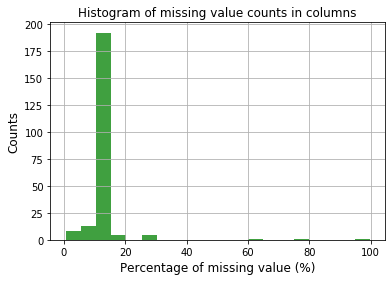

In [19]:
plot_hist_missing_col(df_nulls)

In [20]:
# it is c;ear from the above that most of the data has less than 20% of their values as null.
print(df_nulls[df_nulls.pct > 20])
df_nulls[df_nulls.pct > 20].count()

                              nulls    pct
TITEL_KZ                     889061  99.76
AGER_TYP                     677503  76.02
CAMEO_DEUG_2015              558337  62.65
D19_KONSUMTYP                257113  28.85
D19_GESAMT_ONLINE_QUOTE_12   257113  28.85
D19_VERSAND_ONLINE_QUOTE_12  257113  28.85
D19_BANKEN_ONLINE_QUOTE_12   257113  28.85


nulls    7
pct      7
dtype: int64

In [21]:
# remove the columns from the dataset that have more than 20% of their values as null, one way or the other
azdias_sel_cols.drop(columns=df_nulls[df_nulls.pct>20].index, inplace=True)
final_column_list = azdias_sel_cols.columns

/Users/nareshsharma/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
azdias_sel_cols.describe()

GEBURTSJAHR  LP_LEBENSPHASE_FEIN      KBA05_KW3     KBA05_SEG8  \
count  891221.000000        793589.000000  757897.000000  757897.000000   
mean     1101.178533            16.332161       1.551242       0.901281   
std       976.583551            12.242378       1.607973       1.472815   
min         0.000000             1.000000       0.000000       0.000000   
25%         0.000000             6.000000       0.000000       0.000000   
50%      1943.000000            13.000000       1.000000       0.000000   
75%      1970.000000            28.000000       2.000000       1.000000   
max      2017.000000            40.000000       9.000000       9.000000   

       KBA13_MERCEDES            KKK  KBA13_KRSSEG_VAN  KBA13_CCM_1600  \
count   785421.000000  770025.000000     785421.000000   785421.000000   
mean         3.144134       2.592991          1.945301        3.029111   
std          1.023847       1.119052          0.615499        0.938871   
min          1.000000       0.000000          0.000000        1.000000   
25%          3.000000       2.000000          2.000000        2.000000   
50%          3.000000       3.000000          2.000000        3.000000   
75%          4.000000       3.000000          2.000000        4.000000   
max          5.000000       4.000000          3.000000        5.000000   

          KBA05_MOD3  PRAEGENDE_JUGENDJAHRE  KBA13_HALTER_50  KBA05_MODTEMP  \
count  757897.000000          783057.000000    785421.000000  788524.000000   
mean        3.096057               9.280709         2.844840       2.970215   
std         1.350524               4.032107         1.053112       1.218946   
min         1.000000               1.000000         1.000000       1.000000   
25%         2.000000               6.000000         2.000000       2.000000   
50%         3.000000               9.000000         3.000000       3.000000   
75%         4.000000              14.000000         3.000000       4.000000   
max         9.000000              15.000000         5.000000       5.000000   

         KBA13_MOTOR  WOHNDAUER_2008  HH_EINKOMMEN_SCORE  KBA13_BJ_2000  \
count  785421.000000   817722.000000       872873.000000  785421.000000   
mean        2.786029        7.908791            4.207243       2.990920   
std         0.768496        1.923137            1.624057       0.997081   
min         1.000000        1.000000            1.000000       1.000000   
25%         2.000000        8.000000            3.000000       2.000000   
50%         3.000000        9.000000            5.000000       3.000000   
75%         3.000000        9.000000            6.000000       4.000000   
max         4.000000        9.000000            6.000000       5.000000   

        ANZ_HH_TITEL    KBA05_ANTG3      KBA13_BMW  KBA13_HERST_SONST  \
count  794213.000000  757897.000000  785421.000000      785421.000000   
mean        0.040647       0.624525       3.159222           2.988924   
std         0.324028       1.013443       1.000801           1.008135   
min         0.000000       0.000000       1.000000           1.000000   
25%         0.000000       0.000000       3.000000           2.000000   
50%         0.000000       0.000000       3.000000           3.000000   
75%         0.000000       1.000000       4.000000           4.000000   
max        23.000000       3.000000       5.000000           5.000000   

       KBA13_SEG_MITTELKLASSE  NATIONALITAET_KZ    KBA13_KW_30    KBA13_KW_40  \
count           785421.000000     782906.000000  785421.000000  785421.000000   
mean                 3.058855          1.168889       1.404983       2.405066   
std                  1.026028          0.475075       0.681106       1.412106   
min                  1.000000          1.000000       1.000000       0.000000   
25%                  2.000000          1.000000       1.000000       1.000000   
50%                  3.000000          1.000000       1.000000       3.000000   
75%                  4.000000          1.000000      

In [23]:
azdias_sel_cols.shape

(891221, 265)

In [24]:
# All the columns that can be treated as a numerical measure of something, we'll use mean value to replace the NaNs
# For Cateforical columns, we'll use mode to replace the NaN values
category_columns = df_attrs[(df_attrs.Type.str.lower()=='category') & 
                            df_attrs.Attribute.isin(final_column_list)
                           ].Attribute.values
numerical_columns = df_attrs[(df_attrs.Type.str.lower()!='category') & 
                             df_attrs.Attribute.isin(final_column_list)].Attribute.values
print(category_columns)
print(numerical_columns)
print(len(category_columns) + len(numerical_columns))
df_attrs.count()

['ANREDE_KZ' 'CAMEO_DEU_2015' 'CJT_GESAMTTYP' 'D19_BANKEN_DATUM'
 'D19_BANKEN_OFFLINE_DATUM' 'D19_BANKEN_ONLINE_DATUM' 'D19_GESAMT_DATUM'
 'D19_GESAMT_OFFLINE_DATUM' 'D19_GESAMT_ONLINE_DATUM' 'D19_TELKO_ANZ_12'
 'D19_TELKO_ANZ_24' 'D19_TELKO_DATUM' 'D19_TELKO_OFFLINE_DATUM'
 'D19_TELKO_ONLINE_DATUM' 'D19_VERSAND_DATUM' 'D19_VERSAND_OFFLINE_DATUM'
 'D19_VERSAND_ONLINE_DATUM' 'FINANZTYP' 'GEBAEUDETYP' 'GEBAEUDETYP_RASTER'
 'GFK_URLAUBERTYP' 'GREEN_AVANTGARDE' 'HEALTH_TYP' 'KBA05_MAXHERST'
 'KBA05_MAXSEG' 'KBA05_MAXVORB' 'KBA05_MODTEMP' 'KBA05_MOTOR'
 'LP_FAMILIE_FEIN' 'LP_LEBENSPHASE_FEIN' 'LP_LEBENSPHASE_GROB'
 'LP_STATUS_FEIN' 'NATIONALITAET_KZ' 'OST_WEST_KZ' 'PRAEGENDE_JUGENDJAHRE'
 'RETOURTYP_BK_S' 'SHOPPER_TYP' 'VERS_TYP' 'ZABEOTYP']
['ALTERSKATEGORIE_GROB' 'ALTER_HH' 'ANZ_HAUSHALTE_AKTIV' 'ANZ_HH_TITEL'
 'ANZ_PERSONEN' 'ANZ_TITEL' 'BALLRAUM' 'D19_BANKEN_ANZ_12'
 'D19_BANKEN_ANZ_24' 'D19_GESAMT_ANZ_12' 'D19_GESAMT_ANZ_24'
 'D19_VERSAND_ANZ_12' 'D19_VERSAND_ANZ_24' 'D19_VERSI_ANZ_12'

index          314
Attribute      314
Description    314
Value          314
Meaning        314
Type           314
dtype: int64

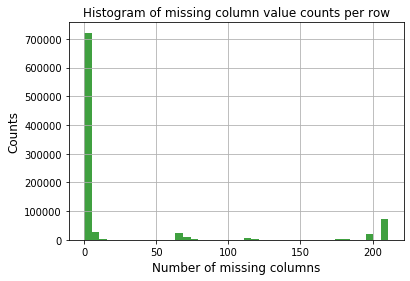

In [25]:
null_row_counts = azdias_sel_cols.isnull().sum(axis=1)
null_row_counts.values

plt.hist(null_row_counts.values, bins=40, facecolor='g', alpha=0.75)

plt.xlabel('Number of missing columns', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of missing column value counts per row', fontsize=12)
plt.grid(True)
plt.show()

In [26]:
print(len(final_column_list))
azdias_sel_cols.info(verbose=True)

265
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 265 columns):
GEBURTSJAHR                    int64
LP_LEBENSPHASE_FEIN            float64
KBA05_KW3                      float64
KBA05_SEG8                     float64
KBA13_MERCEDES                 float64
KKK                            float64
KBA13_KRSSEG_VAN               float64
KBA13_CCM_1600                 float64
KBA05_MOD3                     float64
PRAEGENDE_JUGENDJAHRE          float64
KBA13_HALTER_50                float64
KBA05_MODTEMP                  float64
KBA13_MOTOR                    float64
WOHNDAUER_2008                 float64
HH_EINKOMMEN_SCORE             float64
KBA13_BJ_2000                  float64
ANZ_HH_TITEL                   float64
KBA05_ANTG3                    float64
KBA13_BMW                      float64
KBA13_HERST_SONST              float64
KBA13_SEG_MITTELKLASSE         float64
NATIONALITAET_KZ               float64
KBA13_KW_30                 

In [27]:
# It is clear from the above that most of the rows have less than 10 missing values across columns per row.
# Hence it might be a good idea to only consider rows whose where the number of missing col values <= 20
print(azdias_sel_cols.shape)
azdias_sel_cols = azdias_sel_cols.dropna(thresh=len(azdias_sel_cols.columns)-10)
azdias_sel_cols.shape

(891221, 265)


(749990, 265)

In [28]:
azdias_sel_cols.columns

Index(['GEBURTSJAHR', 'LP_LEBENSPHASE_FEIN', 'KBA05_KW3', 'KBA05_SEG8',
       'KBA13_MERCEDES', 'KKK', 'KBA13_KRSSEG_VAN', 'KBA13_CCM_1600',
       'KBA05_MOD3', 'PRAEGENDE_JUGENDJAHRE',
       ...
       'KBA05_ANTG1', 'KBA13_HERST_ASIEN', 'ALTERSKATEGORIE_GROB',
       'KBA13_KMH_110', 'KBA13_BJ_2004', 'KBA13_SEG_WOHNMOBILE',
       'KBA13_SEG_KOMPAKTKLASSE', 'MOBI_REGIO', 'KBA13_HERST_FORD_OPEL',
       'KBA13_CCM_2500'],
      dtype='object', length=265)

In [29]:
# This is no longer required.. since making the categorical columns as Category type, takes care
# Look at columns of object data type to understand what kind of data it contains
# Look at the catgeory type columns to understand if they are multi-categories of binary categories
azdias_sel_cols.columns.to_series().groupby(azdias_sel_cols.dtypes).groups
# azdias_sel_cols.columns.groupby('dtype').keys # .to_series().groupby()


{dtype('int64'): Index(['GEBURTSJAHR', 'D19_BANKEN_ONLINE_DATUM', 'D19_TELKO_ANZ_12',
        'D19_VERSAND_ANZ_24', 'D19_VERSI_ANZ_12', 'D19_GESAMT_OFFLINE_DATUM',
        'D19_VERSAND_OFFLINE_DATUM', 'SEMIO_RAT', 'SEMIO_LUST',
        'D19_VERSI_ANZ_24', 'ANREDE_KZ', 'SEMIO_VERT', 'SEMIO_TRADV',
        'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'SEMIO_SOZ',
        'GREEN_AVANTGARDE', 'SEMIO_KULT', 'D19_BANKEN_ANZ_12',
        'D19_BANKEN_DATUM', 'FINANZ_VORSORGER', 'D19_BANKEN_OFFLINE_DATUM',
        'D19_TELKO_OFFLINE_DATUM', 'FINANZ_SPARER', 'FINANZ_HAUSBAUER',
        'FINANZ_UNAUFFAELLIGER', 'D19_GESAMT_ONLINE_DATUM', 'D19_VERSAND_DATUM',
        'SEMIO_DOM', 'FINANZTYP', 'D19_TELKO_ANZ_24', 'D19_GESAMT_DATUM',
        'SEMIO_ERL', 'D19_VERSAND_ANZ_12', 'D19_TELKO_ONLINE_DATUM', 'ZABEOTYP',
        'SEMIO_KAEM', 'FINANZ_ANLEGER', 'SEMIO_FAM', 'SEMIO_PFLICHT',
        'FINANZ_MINIMALIST', 'SEMIO_KRIT', 'SEMIO_MAT', 'SEMIO_REL',
        'D19_BANKEN_ANZ_24', 'D19_TELKO_DATUM', 'D19_

In [30]:
# investigate if any of the cateforical columns contains any datetime or any such values
# for colname in ['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']:
#     print("{} = {}".format(colname, azdias_sel_cols[colname].unique()))

In [31]:
object_type_columns = ['OST_WEST_KZ', 'CAMEO_DEU_2015']
azdias_sel_cols[object_type_columns].isnull().sum()

OST_WEST_KZ          0
CAMEO_DEU_2015    3551
dtype: int64

In [32]:
# instead of using a complex process of label encoding the null values for categorical columns, 
# and then removing it etc. 
# since only a small fraction of rows are involved here.. we'll drop these rows
# TBD: This will need to change, because as a result of dropping these rows... 
# some other categorical values might get dropped totally.. and thereby impacting lableencoding later on

azdias_sel_cols.dropna(axis=0, subset=object_type_columns, inplace=True)
print(azdias_sel_cols.OST_WEST_KZ.unique())
azdias_sel_cols[object_type_columns].isnull().sum()

['W' 'O']


OST_WEST_KZ       0
CAMEO_DEU_2015    0
dtype: int64

In [33]:
# now use label encoder to encode the object type labels
# import labelencoder
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)
# # instantiate labelencoder object
# le = LabelEncoder()

# apply le on categorical feature columns
# azdias_sel_cols[object_type_columns] = (azdias_sel_cols[object_type_columns]).astype(str).apply(lambda col: le.fit_transform(col))

azdias_sel_cols[object_type_columns] = azdias_sel_cols[object_type_columns].astype(str).apply(lambda x: d[x.name].fit_transform(x))
# labeled_df = df.apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [34]:
d

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'OST_WEST_KZ': LabelEncoder(), 'CAMEO_DEU_2015': LabelEncoder()})

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [36]:
azdias_sel_cols_filled = imputer.fit_transform(azdias_sel_cols)

azdias_sel_cols_filled

array([[1.996e+03, 2.100e+01, 4.000e+00, ..., 1.000e+00, 2.000e+00,
        3.000e+00],
       [1.979e+03, 3.000e+00, 2.000e+00, ..., 3.000e+00, 3.000e+00,
        3.000e+00],
       [1.957e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 2.000e+00,
        4.000e+00],
       ...,
       [1.976e+03, 1.000e+00, 1.000e+00, ..., 2.000e+00, 3.000e+00,
        4.000e+00],
       [1.994e+03, 2.900e+01, 1.000e+00, ..., 1.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 6.000e+00, 0.000e+00, ..., 3.000e+00, 2.000e+00,
        4.000e+00]])

In [37]:
azdias_sel_cols_filled.shape

(746439, 265)

In [38]:
azdias_sel_cols_filled = pd.DataFrame(azdias_sel_cols_filled, columns = azdias_sel_cols.columns)
print(azdias_sel_cols_filled.isnull().sum().sort_values())
azdias_sel_cols_filled.describe()
print(azdias_sel_cols_filled.shape)

GEBURTSJAHR                    0
GEBAEUDETYP_RASTER             0
KBA05_ANTG4                    0
ONLINE_AFFINITAET              0
SEMIO_ERL                      0
GFK_URLAUBERTYP                0
ALTER_HH                       0
KBA05_CCM1                     0
LP_STATUS_GROB                 0
KBA13_SEG_UTILITIES            0
D19_VERSAND_ANZ_12             0
KBA13_HALTER_40                0
KBA05_KRSZUL                   0
KBA05_HERST2                   0
KBA05_MOTOR                    0
KBA05_KRSHERST3                0
D19_TELKO_ONLINE_DATUM         0
KBA05_MAXAH                    0
KBA13_SEG_OBERKLASSE           0
ZABEOTYP                       0
KBA05_CCM4                     0
KBA13_ALTERHALTER_45           0
SHOPPER_TYP                    0
KBA05_MAXVORB                  0
KBA13_SEG_KLEINWAGEN           0
KBA13_KRSHERST_AUDI_VW         0
KBA05_CCM3                     0
KBA05_ALTER2                   0
KBA13_KMH_0_140                0
KBA13_KW_61_120                0
KBA13_KRSH

(746439, 265)


In [39]:
# before applying get_dummies... convert the categorical columns to categorical type... 
# so that values not present also get a column of their own
common_category_columns = list(set(category_columns).intersection(set(azdias_sel_cols_filled.columns)))
for colname in category_columns:
    print(categorical_dict[colname])
    azdias_sel_cols_filled[colname] = pd.Categorical(azdias_sel_cols_filled[colname], categories = categorical_dict[colname].categories)

[1, 2]
Categories (2, int64): [1, 2]
[1A, 1B, 1C, 1D, 1E, ..., 9A, 9B, 9C, 9D, 9E]
Length: 44
Categories (44, object): [1A, 1B, 1C, 1D, ..., 9B, 9C, 9D, 9E]
[1, 2, 3, 4, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categor

In [40]:
# df_final = azdias_sel_cols_filled.copy()
# for colname in category_columns:
df_final = pd.get_dummies(azdias_sel_cols_filled, columns=category_columns, prefix=category_columns)
df_final.head()

GEBURTSJAHR  KBA05_KW3  KBA05_SEG8  KBA13_MERCEDES  KKK  KBA13_KRSSEG_VAN  \
0       1996.0        4.0         3.0             4.0  2.0               2.0   
1       1979.0        2.0         0.0             4.0  2.0               2.0   
2       1957.0        1.0         0.0             3.0  0.0               2.0   
3       1963.0        3.0         0.0             3.0  3.0               1.0   
4       1943.0        0.0         1.0             3.0  4.0               2.0   

   KBA13_CCM_1600  KBA05_MOD3  KBA13_HALTER_50  KBA13_MOTOR  WOHNDAUER_2008  \
0             2.0         2.0              2.0          3.0             9.0   
1             3.0         5.0              3.0          3.0             9.0   
2             3.0         4.0              5.0          3.0             9.0   
3             1.0         1.0              4.0          4.0             9.0   
4             3.0         3.0              3.0          3.0             9.0   

   HH_EINKOMMEN_SCORE  KBA13_BJ_2000  ANZ_HH_TITEL  KBA05_ANTG3  KBA13_BMW  \
0                 6.0            3.0           0.0          0.0        3.0   
1                 4.0            2.0           0.0          1.0        4.0   
2                 1.0            2.0           0.0          0.0        4.0   
3                 5.0            3.0           0.0          1.0        2.0   
4                 5.0            2.0           0.0          0.0        4.0   

   KBA13_HERST_SONST  KBA13_SEG_MITTELKLASSE  KBA13_KW_30  KBA13_KW_40  \
0                3.0                     3.0          1.0          2.0   
1                3.0                     2.0          1.0          1.0   
2                2.0                     4.0          1.0          4.0   
3                2.0                     2.0          1.0          5.0   
4                2.0                     3.0          1.0          0.0   

   KBA13_FAB_ASIEN  KBA13_KW_0_60  KBA13_TOYOTA  KBA13_CCM_2501  KBA05_SEG2  \
0              2.0            3.0           2.0             3.0         1.0   
1              4.0            1.0           3.0             4.0         5.0   
2              3.0            3.0           3.0             4.0         2.0   
3              3.0            3.0           3.0             5.0         4.0   
4              3.0            2.0           4.0             3.0         3.0   

   KONSUMNAEHE  KBA05_ZUL3  KBA13_VORB_1  KBA05_FRAU  KBA13_AUTOQUOTE  \
0          1.0         0.0           3.0         4.0              2.0   
1          5.0         4.0           4.0         3.0              3.0   
2          4.0         3.0           3.0         4.0              3.0   
3          4.0         2.0           2.0         5.0              3.0   
4          5.0         0.0           3.0         5.0              3.0   

   KBA13_HALTER_55  PLZ8_ANTG3  KBA13_HALTER_20  KBA13_ANZAHL_PKW  \
0              3.0         2.0              3.0             963.0   
1              3.0         1.0              3.0             712.0   
2              5.0         2.0              2.0             596.0   
3              4.0         2.0              3.0             435.0   
4              4.0         1.0              3.0            1300.0   

   KBA05_AUTOQUOT  KBA13_KW_70  KBA13_BJ_1999  KBA05_SEG10  KBA05_SEG7  \
0             1.0          1.0            3.0          4.0         3.0   
1             3.0          4.0            2.0          1.0         0.0   
2             4.0          3.0            2.0          1.0         0.0   
3             3.0          2.0            3.0          3.0         1.0   
4             3.0          1.0            2.0          2.0         0.0   

   KBA13_KRSHERST_FORD_OPEL  KBA13_CCM_0_1400  KBA05_GBZ  KBA05_VORB0  \
0                       3.0               2.0        1.0          1.0   
1                       2.0               1.0        3.0          4.0   
2                       2.0               3.0        4.0          2.0   
3                       2.0               3.0        3.0          5

In [41]:
# Let's make sure one final time time that there are no null values left
print(sum(df_final.isnull().sum()))
print(df_final.shape)

0
(746439, 580)


In [42]:
# apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final_scaled = scaler.fit_transform(df_final)
df_final_scaled = pd.DataFrame(df_final_scaled, columns= list(df_final.columns.values))
df_final_scaled.head()

GEBURTSJAHR  KBA05_KW3  KBA05_SEG8  KBA13_MERCEDES       KKK  \
0     0.834653   1.564584    1.478887         0.83226 -0.545692   
1     0.816957   0.294353   -0.619671         0.83226 -0.545692   
2     0.794058  -0.340763   -0.619671        -0.14314 -2.348329   
3     0.800303   0.929469   -0.619671        -0.14314  0.355627   
4     0.779485  -0.975879    0.079848        -0.14314  1.256945   

   KBA13_KRSSEG_VAN  KBA13_CCM_1600  KBA05_MOD3  KBA13_HALTER_50  KBA13_MOTOR  \
0          0.094510       -1.096708   -0.818716        -0.788911     0.281445   
1          0.094510       -0.031271    1.444183         0.163551     0.281445   
2          0.094510       -0.031271    0.689883         2.068475     0.281445   
3         -1.529736       -2.162145   -1.573016         1.116013     1.581384   
4          0.094510       -0.031271   -0.064416         0.163551     0.281445   

   WOHNDAUER_2008  HH_EINKOMMEN_SCORE  KBA13_BJ_2000  ANZ_HH_TITEL  \
0        0.548846            0.990034       0.003695     -0.128359   
1        0.548846           -0.310943      -0.997478     -0.128359   
2        0.548846           -2.262409      -0.997478     -0.128359   
3        0.548846            0.339545       0.003695     -0.128359   
4        0.548846            0.339545      -0.997478     -0.128359   

   KBA05_ANTG3  KBA13_BMW  KBA13_HERST_SONST  KBA13_SEG_MITTELKLASSE  \
0    -0.616583  -0.161786           0.008731               -0.060178   
1     0.367983   0.839069           0.008731               -1.033490   
2    -0.616583   0.839069          -0.983020                0.913133   
3     0.367983  -1.162640          -0.983020               -1.033490   
4    -0.616583   0.839069          -0.983020               -0.060178   

   KBA13_KW_30  KBA13_KW_40  KBA13_FAB_ASIEN  KBA13_KW_0_60  KBA13_TOYOTA  \
0    -0.586972    -0.287790        -0.959093       0.018340     -1.070192   
1    -0.586972    -0.994027         1.008267      -2.046899     -0.076824   
2    -0.586972     1.124682         0.024587       0.018340     -0.076824   
3    -0.586972     1.830918         0.024587       0.018340     -0.076824   
4    -0.586972    -1.700263         0.024587      -1.014280      0.916545   

   KBA13_CCM_2501  KBA05_SEG2  KONSUMNAEHE  KBA05_ZUL3  KBA13_VORB_1  \
0        0.336873   -1.597088    -1.290664   -1.742074      0.023713   
1        1.026448    1.463148     1.304142    0.771679      1.068030   
2        1.026448   -0.832029     0.655440    0.143241      0.023713   
3        1.716022    0.698089     0.655440   -0.485197     -1.020605   
4        0.336873   -0.066970     1.304142   -1.742074      0.023713   

   KBA05_FRAU  KBA13_AUTOQUOTE  KBA13_HALTER_55  PLZ8_ANTG3  KBA13_HALTER_20  \
0    0.679839        -0.726258         0.163568    0.390031         0.096118   
1   -0.074858         0.231828         0.163568   -0.627495         0.096118   
2    0.679839         0.231828         2.048254    0.390031        -0.902690   
3    1.434535         0.231828         1.105911    0.390031         0.096118   
4    1.434535         0.231828         1.105911   -0.627495         0.096118   

   KBA13_ANZAHL_PKW  KBA05_AUTOQUOT  KBA13_KW_70  KBA13_BJ_1999  KBA05_SEG10  \
0          1.025363       -1.598756    -0.933911       0.010025     1.359434   
1          0.281495       -0.144689     1.162885      -1.029006    -0.671049   
2         -0.062285        0.582344     0.463953      -1.029006    -0.671049   
3         -0.539427       -0.144689    -0.234979       0.010025     0.682606   
4          2.024103       -0.144689    -0.933911      -1.029006     0.005779   

   KBA05_SEG7  KBA13_KRSHERST_FORD_OPEL  KBA13_CCM_0_1400  KBA05_GBZ  \
0    1.412692                 -0.011815         -0.240680  -1.625133   
1   -0.677116                 -0.971963         -0.931311  -0.119167   
2   -0.677116                 -0.971963          0.449950   0.633816   
3    0.019487                 -0.971963          0.449950  -0.119167   
4   -0.677116                 -0.011815  

In [43]:
list(final_column_list)

['GEBURTSJAHR',
 'LP_LEBENSPHASE_FEIN',
 'KBA05_KW3',
 'KBA05_SEG8',
 'KBA13_MERCEDES',
 'KKK',
 'KBA13_KRSSEG_VAN',
 'KBA13_CCM_1600',
 'KBA05_MOD3',
 'PRAEGENDE_JUGENDJAHRE',
 'KBA13_HALTER_50',
 'KBA05_MODTEMP',
 'KBA13_MOTOR',
 'WOHNDAUER_2008',
 'HH_EINKOMMEN_SCORE',
 'KBA13_BJ_2000',
 'ANZ_HH_TITEL',
 'KBA05_ANTG3',
 'KBA13_BMW',
 'KBA13_HERST_SONST',
 'KBA13_SEG_MITTELKLASSE',
 'NATIONALITAET_KZ',
 'KBA13_KW_30',
 'KBA13_KW_40',
 'OST_WEST_KZ',
 'KBA13_FAB_ASIEN',
 'KBA13_KW_0_60',
 'KBA13_TOYOTA',
 'KBA13_CCM_2501',
 'KBA05_SEG2',
 'KONSUMNAEHE',
 'KBA05_ZUL3',
 'KBA13_VORB_1',
 'D19_BANKEN_ONLINE_DATUM',
 'KBA05_FRAU',
 'KBA13_AUTOQUOTE',
 'KBA13_HALTER_55',
 'LP_LEBENSPHASE_GROB',
 'PLZ8_ANTG3',
 'KBA13_HALTER_20',
 'KBA13_ANZAHL_PKW',
 'KBA05_AUTOQUOT',
 'KBA13_KW_70',
 'KBA13_BJ_1999',
 'KBA05_SEG10',
 'KBA05_SEG7',
 'KBA13_KRSHERST_FORD_OPEL',
 'HEALTH_TYP',
 'KBA13_CCM_0_1400',
 'KBA05_GBZ',
 'D19_TELKO_ANZ_12',
 'KBA05_VORB0',
 'D19_VERSAND_ANZ_24',
 'KBA05_MAXSEG',
 'KB

In [50]:
### Based on the data clean and transformation etc., create a function to prepare data for clustering etc.
def clean_prepare_data(df):

    # Replace unknowns with null
    df, dict_cats = mark_invalid_values_as_null(df)
    df = mark_unknown_as_null(df)
    
    # 1. First of all drop all the columns that are either not part of the attributes list or had too many null values
    df = df[list(final_column_list)]
    print(len(df.columns))
    
#     # 2. Delete all rows that have more than 10 columns with null values
#     df = df.dropna(thresh=len(df.columns)-10)

    
    # 2. Delete all rows with object type data, with null values
    df = df.dropna(axis=0, subset=object_type_columns)
    print(len(df.columns))
    
    # 3. Use the previous Label encoder to encode the categorical columns
    df[object_type_columns] = df[object_type_columns].astype(str).apply(lambda x: d[x.name].fit_transform(x))
    print(len(df.columns))

    # 4. Use the prevous fitted imputer to fillna
    imputed_data = imputer.transform(df)
    df = pd.DataFrame(imputed_data, columns = df.columns)
    print(len(df.columns))

#     df[category_columns] = df[category_columns].astype(int)
#     print('converted all categorical columns to integer type')

    common_category_columns = list(set(category_columns).intersection(set(df.columns)))
    for colname in common_category_columns:
        df[colname] = pd.Categorical(df[colname], categories = categorical_dict[colname].categories)
    
    # 5. Use the hotencoding to transform cateorical rows to columns
    df = pd.get_dummies(df, columns=category_columns, prefix=category_columns)
    print(len(df.columns))
    
    # 6. Apply the previously fitted scaler
    scaled_data = scaler.transform(df)
    df = pd.DataFrame(scaled_data, columns= list(df.columns.values))

    
    # return the final dataset
    return df

In [51]:
# release unwanted variables holding large datasets
# del df_final
# del azdias_sel_cols_filled
# del azdias_sel_cols

import gc
gc.collect()

0

In [52]:
azdias[final_column_list].head()

GEBURTSJAHR  LP_LEBENSPHASE_FEIN  KBA05_KW3  KBA05_SEG8  KBA13_MERCEDES  \
0            0                 15.0        NaN         NaN             NaN   
1         1996                 21.0        4.0         3.0             4.0   
2         1979                  3.0        2.0         0.0             4.0   
3         1957                  NaN        1.0         0.0             3.0   
4         1963                 32.0        3.0         0.0             3.0   

   KKK  KBA13_KRSSEG_VAN  KBA13_CCM_1600  KBA05_MOD3  PRAEGENDE_JUGENDJAHRE  \
0  NaN               NaN             NaN         NaN                    NaN   
1  2.0               2.0             2.0         2.0                   14.0   
2  2.0               2.0             3.0         5.0                   15.0   
3  0.0               2.0             3.0         4.0                    8.0   
4  3.0               1.0             1.0         1.0                    8.0   

   KBA13_HALTER_50  KBA05_MODTEMP  KBA13_MOTOR  WOHNDAUER_2008  \
0              NaN            NaN          NaN             NaN   
1              2.0            1.0          3.0             9.0   
2              3.0            4.0          3.0             9.0   
3              5.0            3.0          3.0             9.0   
4              4.0            3.0          4.0             9.0   

   HH_EINKOMMEN_SCORE  KBA13_BJ_2000  ANZ_HH_TITEL  KBA05_ANTG3  KBA13_BMW  \
0                 2.0            NaN           NaN          NaN        NaN   
1                 6.0            3.0           0.0          0.0        3.0   
2                 4.0            2.0           0.0          1.0        4.0   
3                 1.0            2.0           0.0          0.0        4.0   
4                 5.0            3.0           0.0          1.0        2.0   

   KBA13_HERST_SONST  KBA13_SEG_MITTELKLASSE  NATIONALITAET_KZ  KBA13_KW_30  \
0                NaN                     NaN               NaN          NaN   
1                3.0                     3.0               1.0          1.0   
2                3.0                     2.0               1.0          1.0   
3                2.0                     4.0               1.0          1.0   
4                2.0                     2.0               1.0          1.0   

   KBA13_KW_40 OST_WEST_KZ  KBA13_FAB_ASIEN  KBA13_KW_0_60  KBA13_TOYOTA  \
0          NaN         NaN              NaN            NaN           NaN   
1          2.0           W              2.0            3.0           2.0   
2          1.0           W              4.0            1.0           3.0   
3          4.0           W              3.0            3.0           3.0   
4          5.0           W              3.0            3.0           3.0   

   KBA13_CCM_2501  KBA05_SEG2  KONSUMNAEHE  KBA05_ZUL3  KBA13_VORB_1  \
0             NaN         NaN          NaN         NaN           NaN   
1             3.0         1.0          1.0         0.0           3.0   
2             4.0         5.0          5.0         4.0           4.0   
3             4.0         2.0          4.0         3.0           3.0   
4             5.0         4.0          4.0         2.0           2.0   

   D19_BANKEN_ONLINE_DATUM  KBA05_FRAU  KBA13_AUTOQUOTE  KBA13_HALTER_55  \
0                       10         NaN              NaN              NaN   
1                       10         4.0              2.0              3.0   
2                       10         3.0              3.0              3.0   
3                       10         4.0              3.0              5.0   
4                        5         5.0              3.0              4.0   

   LP_LEBENSPHASE_GROB  PLZ8_ANTG3  KBA13_HALTER_20  KBA13_ANZAHL_PKW  \
0                  4.0         NaN              NaN               NaN   
1                  6.0         2.0              3.0             963.0   
2                  1.0         1.0              3.0             712.0   
3                  NaN         2.0              2.0             596.0   
4     

In [53]:
df_clean_general = clean_prepare_data(azdias)

Numerical
Category
LP_LEBENSPHASE_FEIN
valid values for column:LP_LEBENSPHASE_FEIN, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40]
793589
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
PRAEGENDE_JUGENDJAHRE
valid values for column:PRAEGENDE_JUGENDJAHRE, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
783057
Numerical
Category
KBA05_MODTEMP
valid values for column:KBA05_MODTEMP, are [1 2 3 4 5]
788524
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
NATIONALITAET_KZ
valid values for column:NATIONALITAET_KZ, are [1 2 3]
782906
Numerical
Numerical
Category
OST_WEST_KZ
valid values for column:OST_WEST_KZ, are ['O' 'W']
798073
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
D19_BANKEN_ONLINE_DATUM
valid values for column:D19_BANKEN_ONLINE_DATUM, are [1 2 3 4 5 6 7 8 9 10]
891221
Numerical
Numerical
Numeric

In [54]:
print(df_clean_general.shape)
print(df_final_scaled.shape)
# transfomed_columns = df_final_scaled.columns
# df = df[transfomed_columns]


(791869, 580)
(746439, 580)


In [55]:
print(set(df_clean_general.columns)-(set(df_final_scaled.columns)))

set()


In [56]:
df_clean_general.columns.sort_values()

Index(['ALTERSKATEGORIE_GROB', 'ALTER_HH', 'ANREDE_KZ_1', 'ANREDE_KZ_2',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'BALLRAUM', 'CAMEO_DEU_2015_1A',
       ...
       'VERS_TYP_2', 'WOHNDAUER_2008', 'WOHNLAGE', 'W_KEIT_KIND_HH',
       'ZABEOTYP_1', 'ZABEOTYP_2', 'ZABEOTYP_3', 'ZABEOTYP_4', 'ZABEOTYP_5',
       'ZABEOTYP_6'],
      dtype='object', length=580)

In [57]:
# make sure that the above data preparation on customer dataset will leave us with the same columns and enough rows
df_customers = clean_prepare_data(customers)


Numerical
Category
LP_LEBENSPHASE_FEIN
valid values for column:LP_LEBENSPHASE_FEIN, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40]
140599
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
PRAEGENDE_JUGENDJAHRE
valid values for column:PRAEGENDE_JUGENDJAHRE, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
143165
Numerical
Category
KBA05_MODTEMP
valid values for column:KBA05_MODTEMP, are [1 2 3 4 5]
140960
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
NATIONALITAET_KZ
valid values for column:NATIONALITAET_KZ, are [1 2 3]
142902
Numerical
Numerical
Category
OST_WEST_KZ
valid values for column:OST_WEST_KZ, are ['O' 'W']
141725
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
D19_BANKEN_ONLINE_DATUM
valid values for column:D19_BANKEN_ONLINE_DATUM, are [1 2 3 4 5 6 7 8 9 10]
191652
Numerical
Numerical
Numeric

In [58]:
print(df_customers.shape)

(141098, 580)


In [59]:
print(set(df_clean_general.columns).difference(set(df_customers.columns)))

set()


In [60]:
print(customers.GEBAEUDETYP.unique())
# print(df_customers.GEBAEUDETYP.unique())

[ 1. nan  8.  2.  3.  4.  6.]


In [61]:

# use PCA for analysis and dimensionality reduction
from sklearn.decomposition import PCA

# let's create a reusable function to execute PCA on data to a stated n number of components
# because we'll need to experiment with different number of PCA components
def do_pca(data, n):
    pca = PCA(n_components=n, random_state=1)
    X_pca = pca.fit_transform(data)
    return pca, X_pca

In [62]:
# Let's reduce the component by half and see how the explained variance varies with the number of components
# Total number of dimensions currently is 600.. so let's do PCA with 300 components
pca, X_pca = do_pca(df_clean_general, 300)

In [63]:
len(pca.explained_variance_)

300

In [64]:
## Let's plot how the variance varies with the number of components of PCA
# to decide an appropriate number of components to choose.
# We will try to get preserve at least 805 of the variance
def plot_variance(pca):
    num_components=len(pca.explained_variance_ratio_)
    num_components = np.arange(num_components)
    ratios = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(ratios)
    ax.bar(num_components, ratios)
    ax.plot(num_components, cumvals)
    
    ax.grid()
    ax.set_axisbelow(True)
    ax.grid(linewidth='0.5', alpha=0.5)
   
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

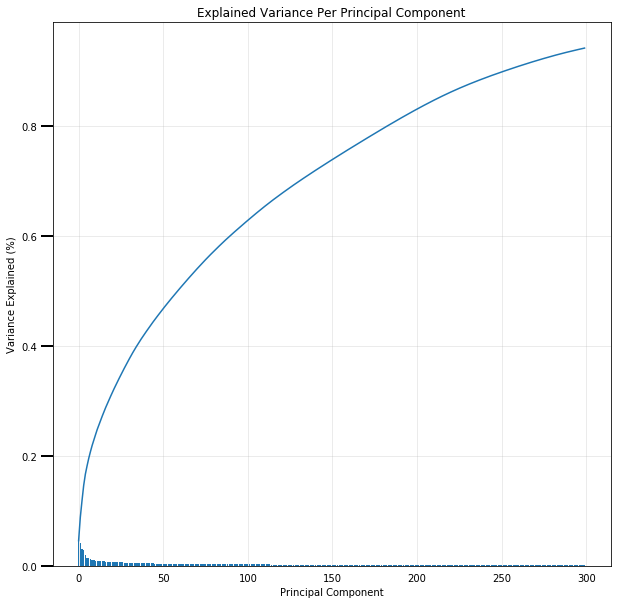

In [65]:
plot_variance(pca)

In [66]:
# we see from the above that roughly 150 of the components explain around 75% of the variance
# also the variance explained does not increase at a high rate with the increase in the number of components beyond 150
# Hence let's now reduce the number of PCA components to 150 and get those components
pca_150, X_pca_150 = do_pca(df_clean_general, 150)

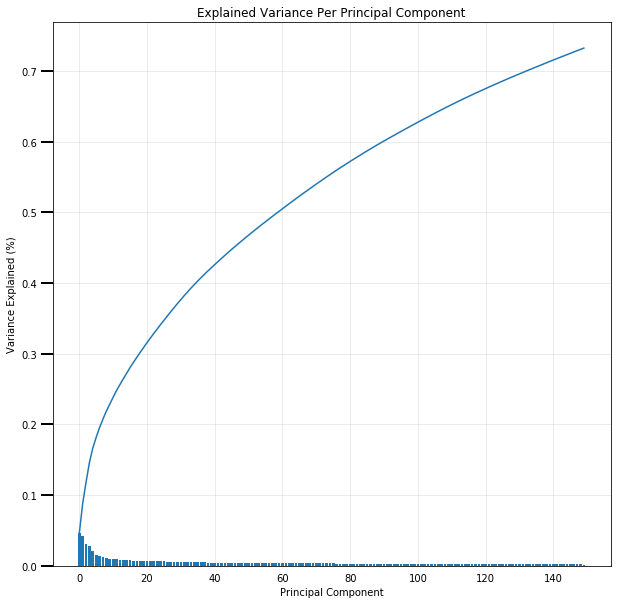

In [67]:
# let's look at the explained variance now to confirm
plot_variance(pca_150)

In [71]:
# now let's look at a few components and map it to the features that contribute the most to those components
pca_150.components_

array([[-0.02719873,  0.14225758,  0.16222356, ..., -0.01276276,
        -0.00535508,  0.00666124],
       [ 0.04930151,  0.03441276,  0.02557491, ...,  0.00615606,
        -0.04476062, -0.0375871 ],
       [ 0.04082878, -0.04979806, -0.0118598 , ...,  0.05089398,
         0.02956033, -0.01106004],
       ...,
       [ 0.02378522, -0.01208835, -0.00369261, ...,  0.00024548,
         0.0229597 ,  0.05482967],
       [-0.01922639,  0.00401044, -0.00548621, ...,  0.00462953,
        -0.03220419, -0.00270474],
       [ 0.00628792,  0.03662914, -0.01285608, ...,  0.07092459,
        -0.04878073,  0.00219683]])

In [72]:
component_names = ['comp-{}'.format(i) for i in range(1, len(pca_150.components_)+1)]
df_components = pd.DataFrame(pca_150.components_, columns=df_clean_general.columns, index=component_names)
df_components.head()

GEBURTSJAHR  KBA05_KW3  KBA05_SEG8  KBA13_MERCEDES       KKK  \
comp-1    -0.027199   0.142258    0.162224        0.015039 -0.009398   
comp-2     0.049302   0.034413    0.025575        0.024364 -0.041720   
comp-3     0.040829  -0.049798   -0.011860       -0.147955  0.065853   
comp-4     0.054759   0.043558    0.031728        0.071058 -0.016801   
comp-5     0.046643   0.005763    0.002352       -0.015671  0.008726   

        KBA13_KRSSEG_VAN  KBA13_CCM_1600  KBA05_MOD3  KBA13_HALTER_50  \
comp-1         -0.006934       -0.003521    0.117720        -0.017969   
comp-2          0.042758       -0.011594    0.007134         0.086943   
comp-3         -0.001770        0.050626    0.036933         0.066925   
comp-4         -0.016934       -0.020836   -0.000179        -0.075173   
comp-5         -0.031556        0.017856    0.009905        -0.088417   

        KBA13_MOTOR  WOHNDAUER_2008  HH_EINKOMMEN_SCORE  KBA13_BJ_2000  \
comp-1    -0.002441        0.004764            0.012835      -0.004732   
comp-2     0.006047        0.014929           -0.147192      -0.060341   
comp-3    -0.000418       -0.020744            0.050681       0.059380   
comp-4     0.001328       -0.065652            0.022773       0.010509   
comp-5    -0.027303        0.020939            0.002254      -0.008711   

        ANZ_HH_TITEL  KBA05_ANTG3  KBA13_BMW  KBA13_HERST_SONST  \
comp-1      0.013883    -0.009211   0.015980           0.007218   
comp-2     -0.017968    -0.091987   0.010465          -0.042061   
comp-3     -0.024105     0.010301  -0.141212           0.020376   
comp-4      0.012854     0.026541   0.076308           0.008744   
comp-5      0.020197     0.035974  -0.002407           0.054784   

        KBA13_SEG_MITTELKLASSE  KBA13_KW_30  KBA13_KW_40  KBA13_FAB_ASIEN  \
comp-1               -0.002740     0.000316    -0.005384        -0.008888   
comp-2               -0.021790    -0.003724    -0.031586        -0.027208   
comp-3                0.009263     0.021302     0.061819         0.090470   
comp-4                0.004411    -0.007606    -0.016781        -0.044130   
comp-5                0.015621    -0.014428     0.002824         0.030651   

        KBA13_KW_0_60  KBA13_TOYOTA  KBA13_CCM_2501  KBA05_SEG2  KONSUMNAEHE  \
comp-1      -0.012766     -0.001607        0.011070    0.118430    -0.020614   
comp-2      -0.051083     -0.023575        0.030441   -0.003415     0.096559   
comp-3       0.110371      0.022602       -0.116892    0.068787     0.063045   
comp-4      -0.033354     -0.007074        0.047495   -0.006961    -0.077342   
comp-5       0.016885      0.038590       -0.026226    0.012705    -0.058796   

        KBA05_ZUL3  KBA13_VORB_1  KBA05_FRAU  KBA13_AUTOQUOTE  \
comp-1    0.112303      0.003413    0.122917        -0.020147   
comp-2    0.040726      0.027839    0.008215         0.125277   
comp-3    0.007369     -0.002648    0.015764         0.032892   
comp-4    0.002723     -0.011079    0.015741        -0.077552   
comp-5    0.009957     -0.002423    0.009440        -0.101720   

        KBA13_HALTER_55  PLZ8_ANTG3  KBA13_HALTER_20  KBA13_ANZAHL_PKW  \
comp-1        -0.020347    0.014589        -0.017806         -0.003544   
comp-2         0.092070   -0.135970         0.041649          0.054087   
comp-3         0.061470   -0.012113         0.095444         -0.025642   
comp-4        -0.082336    0.072955        -0.077126         -0.010792   
comp-5        -0.087606    0.097956        -0.044283         -0.057623   

        KBA05_AUTOQUOT  KBA13_KW_70  KBA13_BJ_1999  KBA05_SEG10  KBA05_SEG7  \
comp-1        0.117811    -0.002813      -0.006557     0.139945    0.156873   
comp-2        0.112439    -0.006224      -0.041421     0.053913    0.034495   
comp-3        0.042922     0.033605       0.058899    -0.009567    0.017395   
comp-4       -0.033000    -0.013134      -0.000781     0.023622    0.013150   
comp-5       -0.032565     0.005970      -0.006390    -0.017456   -0.010509   

        KBA13_KRSHERST_FORD_OPEL 

In [73]:
def show_top_n_fetaures(component_n, n_features):
    '''
    component_n: prinicipal component number
    n_features: number of top positive and top negatively contributing features
    '''
    comp_name = 'comp-{}'.format(component_n)
    top_5 = df_components.loc[comp_name].sort_values(ascending=False)[:n_features]
    neg_5 = df_components.loc[comp_name].sort_values(ascending=True)[:n_features]
    
    print('Top 5 features positively corelated to compoenent {} are:'.format(component_n))
    print(top_5)
    
    print('Top 5 features negatively corelated to compoenent {} are:'.format(component_n))
    print(neg_5)

In [74]:
show_top_n_fetaures(1, 5)

Top 5 features positively corelated to compoenent 1 are:
KBA05_SEG6        0.194461
KBA05_KRSVAN      0.172217
KBA05_KRSOBER     0.172174
KBA05_KRSZUL      0.167334
KBA05_KRSKLEIN    0.163594
Name: comp-1, dtype: float64
Top 5 features negatively corelated to compoenent 1 are:
ONLINE_AFFINITAET    -0.046072
D19_GESAMT_ANZ_24    -0.039162
D19_GESAMT_ANZ_12    -0.035720
D19_VERSAND_ANZ_24   -0.034795
D19_VERSAND_ANZ_12   -0.031301
Name: comp-1, dtype: float64


In [75]:
show_top_n_fetaures(2, 5)

Top 5 features positively corelated to compoenent 2 are:
LP_STATUS_GROB    0.148441
PLZ8_ANTG1        0.136822
MOBI_REGIO        0.134293
KBA05_ANTG1       0.127757
KBA05_GBZ         0.126978
Name: comp-2, dtype: float64
Top 5 features negatively corelated to compoenent 2 are:
HH_EINKOMMEN_SCORE   -0.147192
PLZ8_ANTG3           -0.135970
PLZ8_ANTG4           -0.132283
PLZ8_BAUMAX          -0.129418
FINANZ_HAUSBAUER     -0.126703
Name: comp-2, dtype: float64


In [76]:
show_top_n_fetaures(3, 5)

Top 5 features positively corelated to compoenent 3 are:
KBA13_SITZE_5           0.137812
KBA13_KMH_140_210       0.126327
KBA13_SEG_KLEINWAGEN    0.123991
KBA13_KMH_180           0.119621
KBA13_HALTER_25         0.115828
Name: comp-3, dtype: float64
Top 5 features negatively corelated to compoenent 3 are:
KBA13_HERST_BMW_BENZ          -0.171367
KBA13_MERCEDES                -0.147955
KBA13_SEG_OBEREMITTELKLASSE   -0.143789
KBA13_BMW                     -0.141212
KBA13_SEG_SPORTWAGEN          -0.133740
Name: comp-3, dtype: float64


In [78]:
# Be sure to add in a lot more cells (both markdown and code) to document your
# approach and findings!

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [79]:
from sklearn.cluster import KMeans

def apply_kmeans(data, n):
    '''
    PARAMS:
        data - dataframe that contains the data to cluster
        n - number of clusters required
    RETURN
        Returns the KMeans clustering score
    '''
    kmeans = KMeans(n_clusters=n, random_state=1)
    model = kmeans.fit(data)
    return np.abs(model.score(data))

In [80]:
# try out KMeans with diff. number of clusters
# let's first try till 14 number of clusters to see if we can get an elbow that gives us an optimum
scores = []

for i in range(2,14,2):
    score = round(apply_kmeans(X_pca_150, i),2)
    print('center : {}     score : {}'.format(i, score))
    scores.append(score)

center : 2     score : 292770211.86
center : 4     score : 273481773.28
center : 6     score : 264699042.5
center : 8     score : 259151629.12
center : 10     score : 254498945.41
center : 12     score : 250915296.04


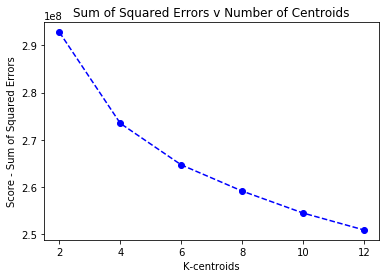

In [81]:
# Let's plot the scores against the number of clusters
plt.plot(range(2,14,2), scores, linestyle='--', marker='o', color='b');
plt.xlabel('K-centroids');
plt.ylabel('Score - Sum of Squared Errors');
plt.title('Sum of Squared Errors v Number of Centroids');

In [82]:
# From the above chart, a slight elbow shape can be seen at 6, hence let's go with 6 clusters

kmeans_6 = KMeans(n_clusters=6, random_state=1)

# Then fit the model to your data using the fit method
model_general = kmeans_6.fit(X_pca_150)

# Finally predict the labels or clusters on the same data using the predict method 
predict_general_clusters = model_general.predict(X_pca_150)

In [83]:
predict_general_clusters

array([5, 1, 2, ..., 4, 5, 0], dtype=int32)

In [84]:
# look at the cluster number that the first few 

In [85]:
pd.Series(predict_general_clusters).value_counts().sort_values()

3     14485
1    122555
4    147348
0    161190
5    168768
2    177523
dtype: int64

In [86]:
# Now let's perform clustering on the customer data

In [89]:
df_customers = df_customers[df_clean_general.columns]

In [90]:
# performm PCA on the customer data
customers_pca = pca_150.transform(df_customers)

In [91]:
customers_clusters = kmeans_6.predict(customers_pca)

In [92]:
customers_clusters

array([1, 1, 2, ..., 1, 0, 4], dtype=int32)

In [93]:
pd.Series(customers_clusters).value_counts().sort_values()

3      928
5     2171
0    19568
4    31488
2    33069
1    53874
dtype: int64

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [94]:
mailout_train = pd.read_csv('Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/Users/nareshsharma/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
print(mailout_train.shape)
print((mailout_train.RESPONSE.sum())*100/len(mailout_train))

(42962, 367)
1.2383036171500397


# Observations on data

1. The percentage of folks who actually become a customer is very less... hence we need a way to score with a higher recall

In [111]:
def plot_hist_missing_col(df):
    '''
    INPUT:
        df - (dataframe), dataframe to check for missing data and plot histogram of the missing data in columns
    OUTPUT:
        visualization: (histogram), of the missing data
    '''
    plt.hist(df['pct'], bins=20, facecolor='g', alpha=0.75)

    plt.xlabel('Percentage of missing value (%)', fontsize=12)
    plt.ylabel('Counts', fontsize=12)
    plt.title('Histogram of missing value counts in columns', fontsize=12)
    plt.grid(True)
    plt.show()


def get_null_counts(df):
    null_data = df.isnull().sum()[df.isnull().sum() > 0]
    dict = {'nulls': null_data.values, 'pct': np.round(null_data.values*100/df.shape[0], 2)}
    df_nulls = pd.DataFrame(data=dict, index=null_data.index)
    return df_nulls

0


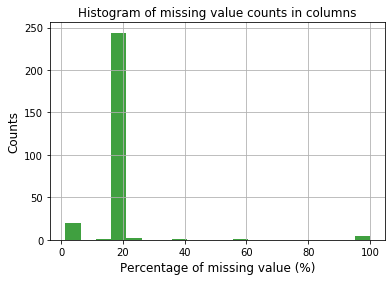

nulls    pct
ALTER_KIND4                  42921  99.90
ALTER_KIND3                  42788  99.59
ALTER_KIND2                  42206  98.24
ALTER_KIND1                  40974  95.37
KK_KUNDENTYP                 25316  58.93
EXTSEL992                    15948  37.12
W_KEIT_KIND_HH                9678  22.53
HH_DELTA_FLAG                 9678  22.53
KBA05_ZUL1                    8648  20.13
KBA05_KRSZUL                  8648  20.13
KBA05_KRSKLEIN                8648  20.13
KBA05_KRSOBER                 8648  20.13
KBA05_KRSVAN                  8648  20.13
KBA05_KW3                     8648  20.13
KBA05_KW1                     8648  20.13
KBA05_KW2                     8648  20.13
KBA05_MAXAH                   8648  20.13
KBA05_KRSHERST2               8648  20.13
KBA05_HERST5                  8648  20.13
KBA05_KRSHERST1               8648  20.13
KBA05_KRSAQUOT                8648  20.13
KBA05_MAXHERST                8648  20.13
KBA05_HERST4                  8648  20.13
KBA05_HERST3                  8648  20.13
KBA05_HERST2                  8648  20.13
KBA05_HERST1                  8648  20.13
KBA05_GBZ                     8648  20.13
KBA05_FRAU                    8648  20.13
KBA05_DIESEL                  8648  20.13
KBA05_CCM4                    8648  20.13
KBA05_CCM3                    8648  20.13
KBA05_MAXBJ                   8648  20.13
KBA05_MOD1                    8648  20.13
KBA05_MAXSEG                  8648  20.13
KBA05_MAXVORB                 8648  20.13
KBA05_ZUL4                    8648  20.13
KBA05_ZUL3                    8648  20.13
KBA05_ZUL2                    8648  20.13
KBA05_VORB2                   8648  20.13
KBA05_VORB1                   8648  20.13
KBA05_VORB0                   8648  20.13
KBA05_SEG9                    8648  20.13
KBA05_SEG8                    8648  20.13
KBA05_SEG7                    8648  20.13
KBA05_SEG6                    8648  20.13
KBA05_SEG5                    8648  20.13
KBA05_SEG4                    8648  20.13
KBA05_SEG3                    8648  20.13
KBA05_SEG2                    8648  20.13
KBA05_SEG10                   8648  20.13
KBA05_SEG1                    8648  20.13
KBA05_MOTRAD                  8648  20.13
KBA05_MOTOR                   8648  20.13
KBA05_MOD8                    8648  20.13
KBA05_MOD4                    8648  20.13
KBA05_MOD3                    8648  20.13
KBA05_MOD2                    8648  20.13
KBA05_CCM1                    8648  20.13
KBA05_CCM2                    8648  20.13
KBA05_KRSHERST3               8648  20.13
KBA05_BAUMAX                  8648  20.13
KBA05_ANHANG                  8648  20.13
MOBI_REGIO                    8648  20.13
KBA05_ALTER2                  8648  20.13
KBA05_ALTER3                  8648  20.13
KBA05_ALTER4                  8648  20.13
KBA05_ALTER1                  8648  20.13
KBA05_ANTG1                   8648  20.13
KBA05_ANTG2                   8648  20.13
KBA05_ANTG3                   8648  20.13
KBA05_ANTG4                   8648  20.13
KBA05_AUTOQUOT                8648  20.13
KKK                           8445  19.66
VHN                           8445  19.66
REGIOTYP                      8445  19.66
ANZ_HH_TITEL                  8246  19.19
PLZ8_ANTG4                    8153  18.98
PLZ8_HHZ                      8153  18.98
PLZ8_ANTG3                    8153  18.98
PLZ8_ANTG2                    8153  18.98
PLZ8_ANTG1                    8153  18.98
PLZ8_BAUMAX                   8153  18.98
PLZ8_GBZ                      8153  18.98
ALTERSKATEGORIE_FEIN          8155  18.98
KBA13_KMH_250                 7962  18.53
KBA13_KMH_251                 7962  18.53
KBA13_KMH_211                 7962  18.53
KBA13_KMH_210                 7962  18.53
KBA13_KMH_180                 7962  18.53
KBA13_KRSAQUOT                7962  18.53
KBA13_KMH_140_210             7962  18.53
KBA13_KRSHERST_BMW_BENZ       7962  18.53
KBA13_KRSHERST_FORD_OPEL      7962  18.53
KBA13_KRSSEG_KLEIN            7962  18.53
KBA13_KRSSEG_OBER             7962  18.

In [123]:
print(mailout_train.RESPONSE.isnull().sum())
mailout_nulls = get_null_counts(mailout_train)
plot_hist_missing_col(mailout_nulls)
mailout_nulls.sort_values(by=['pct'], axis=0, kind='quicksort', ascending=False)
# mailout_nulls

In [136]:
print(len(set(azdias_sel_cols.columns).intersection(set(mailout_train.columns))))
print(set(azdias_sel_cols.columns) - set(mailout_train.columns))

265
set()


In [131]:
# Observations
# The columns that have a large number of nulls pretty much match the columns of general population, having large number of nulls
# Also all the columns that were used for clustering are available in the mailout dataset... so we should be able to apply the same cleanup process to this dataset

In [134]:
# First separate the datset into responses and their equivalent features
df_responses = mailout_train.RESPONSE
df_features = mailout_train.drop(columns=['RESPONSE'])

In [135]:
# Now clean the dataset
df_features_cleaned = clean_prepare_data(df_features)

Numerical
Category
LP_LEBENSPHASE_FEIN
valid values for column:LP_LEBENSPHASE_FEIN, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40]
34059
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
PRAEGENDE_JUGENDJAHRE
valid values for column:PRAEGENDE_JUGENDJAHRE, are [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
35508
Numerical
Category
KBA05_MODTEMP
valid values for column:KBA05_MODTEMP, are [1 2 3 4 5]
34897
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
NATIONALITAET_KZ
valid values for column:NATIONALITAET_KZ, are [1 2 3]
35646
Numerical
Numerical
Category
OST_WEST_KZ
valid values for column:OST_WEST_KZ, are ['O' 'W']
35185
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Numerical
Category
D19_BANKEN_ONLINE_DATUM
valid values for column:D19_BANKEN_ONLINE_DATUM, are [1 2 3 4 5 6 7 8 9 10]
42962
Numerical
Numerical
Numerical
Cat

(35063, 580)

In [157]:
print(df_features_cleaned.shape)
print(df_features.shape)
print(df_features[object_type_columns].isnull().sum())

(35063, 580)
(42962, 366)
OST_WEST_KZ       7777
CAMEO_DEU_2015    7899
dtype: int64


In [149]:
# we need a way to preserve the responses against the original rows

In [144]:
# Let's split the data into train and test data for our model buidling purposes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features_cleaned, df_responses, test_size=0.33, random_state=40)

GEBURTSJAHR  KBA05_KW3  KBA05_SEG8  KBA13_MERCEDES       KKK  \
0    -1.242973   0.294353    0.779368        -0.14314  0.355627   
1     0.794058  -0.975879   -0.619671        -0.14314 -0.545692   
2     0.764913  -0.340763   -0.619671        -0.14314 -1.447010   
3     0.759708   1.564584    1.478887         1.80766 -1.447010   
4     0.772199   0.294353    0.079848         0.83226  0.355627   

   KBA13_KRSSEG_VAN  KBA13_CCM_1600  KBA05_MOD3  KBA13_HALTER_50  KBA13_MOTOR  \
0         -1.529736        1.034167    1.444183        -0.788911     0.281445   
1          0.094510       -1.096708   -1.573016         1.116013     1.581384   
2          0.094510       -0.031271    0.689883        -0.788911    -1.018493   
3          0.094510       -0.031271   -0.064416        -1.741373    -1.018493   
4          0.094510       -1.096708    0.689883        -0.788911    -1.018493   

   WOHNDAUER_2008  HH_EINKOMMEN_SCORE  KBA13_BJ_2000  ANZ_HH_TITEL  \
0        0.548846            0.990034       0.003695     -0.128359   
1        0.548846           -2.262409       0.003695     -0.128359   
2        0.548846           -2.262409      -0.997478     -0.128359   
3        0.548846           -0.310943      -0.997478     -0.128359   
4        0.548846           -0.310943      -1.998651     -0.128359   

   KBA05_ANTG3  KBA13_BMW  KBA13_HERST_SONST  KBA13_SEG_MITTELKLASSE  \
0    -0.616583   0.839069          -0.983020                1.886445   
1    -0.616583  -2.163494          -0.983020                0.913133   
2    -0.616583  -0.161786           1.000481                1.886445   
3    -0.616583   1.839923           1.000481               -0.060178   
4    -0.616583   0.839069           0.008731                0.913133   

   KBA13_KW_30  KBA13_KW_40  KBA13_FAB_ASIEN  KBA13_KW_0_60  KBA13_TOYOTA  \
0     2.344760     0.418446        -0.959093      -1.014280     -0.076824   
1     2.344760     0.418446         0.024587       0.018340      0.916545   
2    -0.586972    -0.287790        -0.959093       0.018340     -0.076824   
3    -0.586972     0.418446        -1.942773      -1.014280     -2.063560   
4    -0.586972    -0.994027        -0.959093      -2.046899     -0.076824   

   KBA13_CCM_2501  KBA05_SEG2  KONSUMNAEHE  KBA05_ZUL3  KBA13_VORB_1  \
0        1.026448   -0.832029    -1.290664    0.143241      1.068030   
1       -0.352702   -0.066970     0.655440    0.771679      0.023713   
2       -0.352702    0.698089    -0.641963    0.771679      0.023713   
3        1.716022   -0.066970     0.006739    1.400118      0.023713   
4        0.336873   -0.832029     0.006739    0.771679     -2.064922   

   KBA05_FRAU  KBA13_AUTOQUOTE  KBA13_HALTER_55  PLZ8_ANTG3  KBA13_HALTER_20  \
0   -0.074858        -0.726258        -1.721118    0.390031         0.096118   
1   -0.074858         1.189915         1.105911   -0.627495         0.096118   
2   -0.074858        -0.726258        -1.721118   -1.645021         0.096118   
3    0.679839         0.231828        -1.721118   -0.627495        -1.901498   
4   -0.074858         0.231828         0.163568   -1.645021        -0.902690   

   KBA13_ANZAHL_PKW  KBA05_AUTOQUOT  KBA13_KW_70  KBA13_BJ_1999  KBA05_SEG10  \
0         -0.672790       -0.144689     1.162885       0.010025     0.005779   
1         -0.091921       -0.144689     0.463953       1.049056     0.005779   
2         -0.948407        0.582344    -0.933911       0.010025    -0.671049   
3         -0.723172       -0.144689    -1.632843      -1.029006     1.359434   
4         -0.983970       -0.144689    -1.632843      -2.068037    -0.671049   

   KBA05_SEG7  KBA13_KRSHERST_FORD_OPEL  KBA13_CCM_0_1400  KBA05_GBZ  \
0   -0.677116                 -0.011815         -0.240680  -1.625133   
1   -0.677116                 -0.011815         -1.621941   1.386799   
2   -0.677116                 -0.971963         -0.240680   1.386799   
3    0.019487                 -1.932111         -1.621941  -0.119167   
4   -0.677116                 -0.971963  

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10]
    }


clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(df_features_cleaned, df_responses)
print(clf.score(df_features_cleaned, df_responses))
print(clf.best_params_)


ValueError: Found input variables with inconsistent numbers of samples: [35063, 42962]

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
# mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')